##(1) Create the following data and write to a csv file: Generate 10 random points in each of the the following circles
(i) centre at (3,3) and radius 2,

(ii) centre at (7,7) and radius 2,

(iii) centre at (11,11) and radius 2.

Plot the data as well.

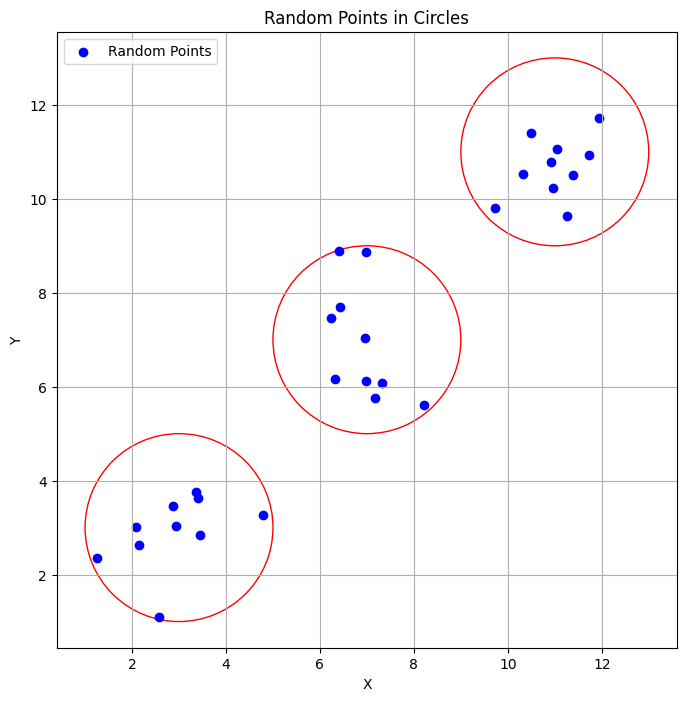

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Define parameters for circles
circles = [
    {'center': (3, 3), 'radius': 2},
    {'center': (7, 7), 'radius': 2},
    {'center': (11, 11), 'radius': 2}
]

# Generate random points in circles
num_points = 10
points = []

for circle in circles:
    center = circle['center']
    radius = circle['radius']
    for _ in range(num_points):
        theta = np.random.uniform(0, 2 * np.pi)
        r = np.random.uniform(0, radius)
        x = center[0] + r * np.cos(theta)
        y = center[1] + r * np.sin(theta)
        points.append((x, y))

# Plot the points
plt.figure(figsize=(8, 8))
for circle in circles:
    plt.gca().add_patch(plt.Circle(circle['center'], circle['radius'], color='r', fill=False))
x_values = [point[0] for point in points]
y_values = [point[1] for point in points]
plt.scatter(x_values, y_values, color='b', label='Random Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Points in Circles')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

# Write data to CSV file
with open('K_means_data.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['X', 'Y'])
    writer.writerows(points)

In [ ]:
# Load the data from the CSV file
data = np.loadtxt('K_means_data.csv', delimiter=',', skiprows=1)
print(data)

[[ 2.93476571  3.03523022]
 [ 2.14026922  2.62990405]
 [ 1.25260479  2.34422565]
 [ 3.45590317  2.84540093]
 [ 2.88220137  3.46697522]
 [ 3.4056979   3.62049622]
 [ 4.77893485  3.26458192]
 [ 3.36830313  3.76183684]
 [ 2.56514698  1.10241591]
 [ 2.07784432  3.01905117]
 [ 6.99081342  8.86666123]
 [ 6.4008761   8.89349159]
 [ 6.24139317  7.47250261]
 [ 6.96284921  7.02711663]
 [ 8.2072115   5.6190752 ]
 [ 7.18150727  5.76172639]
 [ 7.31836707  6.07714552]
 [ 6.97764435  6.11560312]
 [ 6.31671926  6.16876636]
 [ 6.4306503   7.70055924]
 [11.39511867 10.50156061]
 [10.97236393 10.24027592]
 [ 9.71997588  9.7998194 ]
 [11.26439228  9.63588834]
 [11.04112504 11.05161041]
 [10.92970142 10.78904048]
 [11.9379551  11.71208317]
 [10.49706782 11.3993498 ]
 [11.72660277 10.92907574]
 [10.31439318 10.53676389]]


##(2)  Implement K - means clustering algorithm and for the above data, show the change in the centroid as well as the class assignments. Also, plot the cost function for K varying from 1 to 5. Show that the value of K matches with the intuition from the data. Plot the K-classes for the final K-value.

In [ ]:
# Define the range of K values
k_values = range(1, 6)

# Define a function to calculate Euclidean distance
def distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

# Define a function to initialize centroids randomly
def init_centroid(data, k):
    centroids = data.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

# Define a function to assign data points to clusters
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [distance(point, centroid) for centroid in centroids]
        cluster_index = np.argmin(distances)
        clusters.append(cluster_index)
    return np.array(clusters)

# Define a function to update centroids
def new_centroid(data, clusters, k):
    centroids = np.zeros((k, data.shape[1]))
    for cluster_index in range(k):
        cluster_points = data[clusters == cluster_index]
        centroids[cluster_index] = np.mean(cluster_points, axis=0)
    return centroids

# Define a function to calculate the cost function
def cost_func(data, centroids, clusters):
    cost = 0
    for i, point in enumerate(data):
        centroid = centroids[clusters[i]]
        cost += distance(point, centroid) ** 2
    return cost

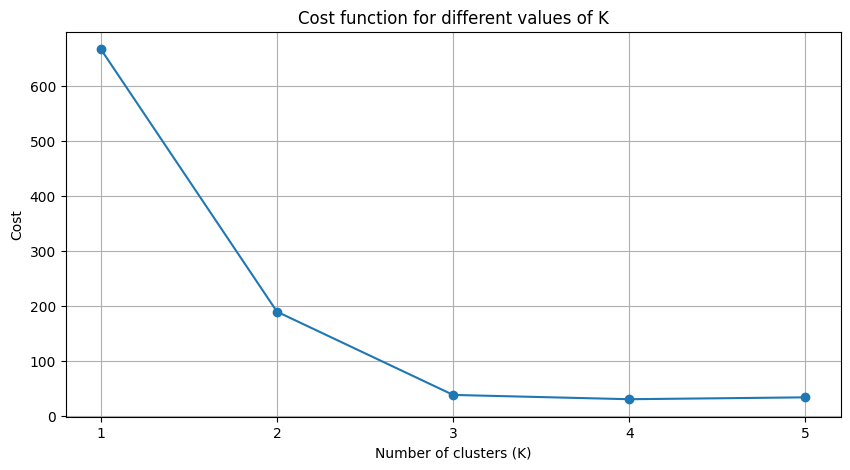

In [ ]:
# Initialize variables to store centroids and cost history
centroids_history = []
costs_history = []

# Fit K-means model for each value of K
for k in k_values:
    # Initialize centroids randomly
    centroids = init_centroid(data, k)

    # Initialize cost to track convergence
    cost = float('inf')

    # Iterate until convergence
    while True:
        # Assign data points to clusters
        clusters = assign_clusters(data, centroids)

        # Update centroids
        new_centroids = new_centroid(data, clusters, k)

        # Calculate the cost function
        new_cost = cost_func(data, new_centroids, clusters)

        # Check for convergence
        if np.isclose(cost, new_cost):
            break

        centroids = new_centroids.copy()
        cost = new_cost

    centroids_history.append(centroids)
    costs_history.append(cost)

# Plot the cost function
plt.figure(figsize=(10, 5))
plt.plot(k_values, costs_history, marker='o')
plt.title('Cost function for different values of K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Cost')
plt.grid(True)
plt.xticks(k_values)
plt.show()

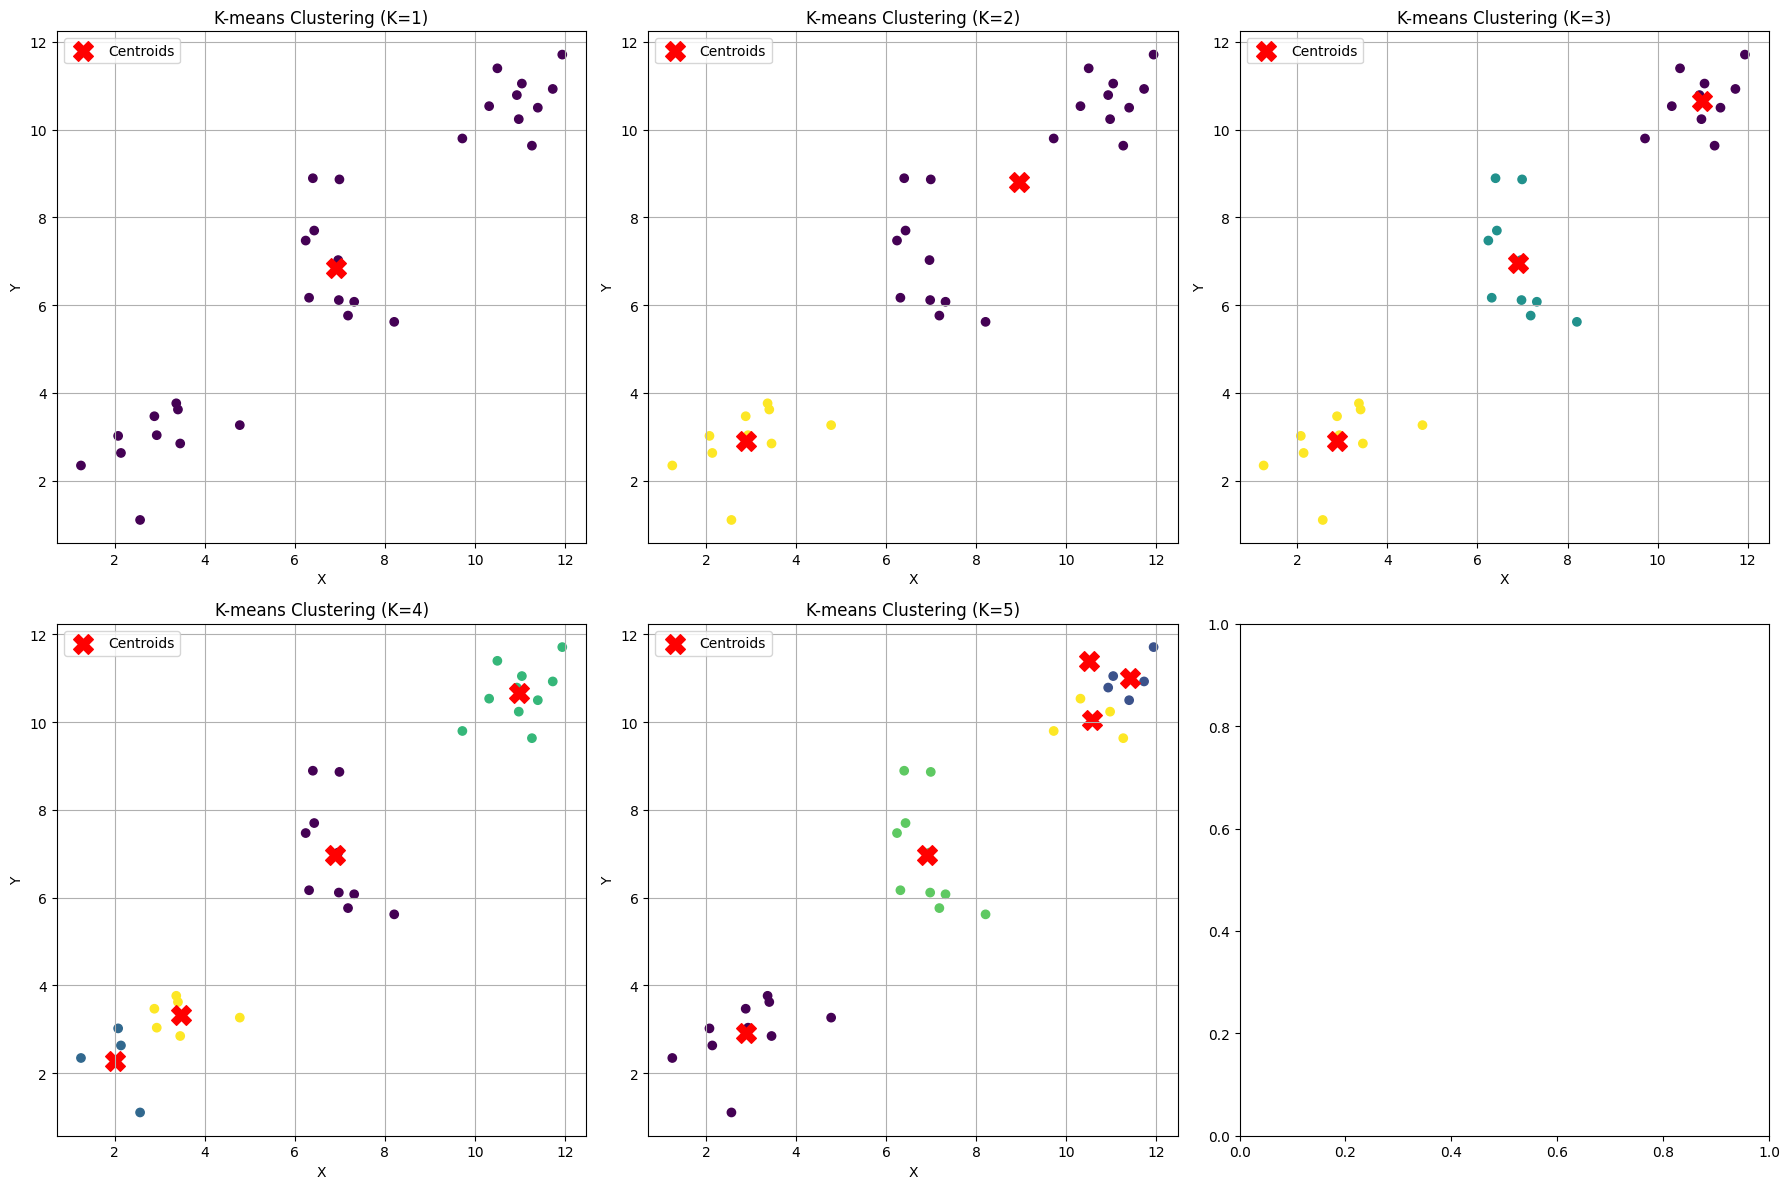

In [ ]:
# Plot the change in centroids for each iteration
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

for i, k in enumerate(k_values):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    ax.scatter(data[:, 0], data[:, 1], c=assign_clusters(data, centroids_history[i]), cmap='viridis')
    ax.scatter(centroids_history[i][:, 0], centroids_history[i][:, 1], c='red', marker='X', s=200, label='Centroids')
    ax.set_title(f'K-means Clustering (K={k})')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()